In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-snapshots-v1/testsnap1.png
/kaggle/input/test-snapshots-v1/testsnap9.png
/kaggle/input/test-snapshots-v1/testsnap6.png
/kaggle/input/test-snapshots-v1/testsnap4.png
/kaggle/input/test-snapshots-v1/testsnap8.png
/kaggle/input/test-snapshots-v1/testsnap3.png
/kaggle/input/test-snapshots-v1/testsnap2.png
/kaggle/input/test-snapshots-v1/testsnap7.png
/kaggle/input/test-snapshots-v1/testsnap10.png
/kaggle/input/test-snapshots-v1/testsnap5.png


In [4]:
https://github.com/THU-MIG/yolov10.git
%cd yolov5
%pip install -qr requirements.txt
%pip install -q Roboflow

print("YOLO DONE")

Cloning into 'yolov5'...
remote: Enumerating objects: 16625, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16625 (delta 58), reused 63 (delta 29), pack-reused 16522
Receiving objects: 100% (16625/16625), 15.16 MiB | 34.20 MiB/s, done.
Resolving deltas: 100% (11415/11415), done.
/kaggle/working/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but 

In [7]:
import torch
import os
from IPython.display import Image, clear_output

print("Setup done")

Setup done


In [10]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="XCHrJcyfE74YFvxZoefE")
project = rf.workspace("roboflow-gw7yv").project("website-screenshots")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Website-Screenshots-1 in yolov5pytorch:: 100%|██████████| 4836/4836 [00:00<00:00, 5199.41it/s]


In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5m.pt --cache

In [ ]:
# Copy the best model weights to the working directory
!cp runs/train/exp/weights/best.pt /kaggle/working/best.pt

In [14]:
import os

# Path to the directory containing the images within the dataset
image_directory = "/kaggle/input/test-snapshots-v1"

# List images in the dataset directory
dataset_images = os.listdir(image_directory)
print("Dataset Images:", dataset_images)

# Perform inference on each image
for image_file in dataset_images:
    if image_file.endswith(".jpg") or image_file.endswith(".png"):
        image_path = os.path.join(image_directory, image_file)
        # Run inference on the image using the YOLOv5 model
        !python detect.py --weights /kaggle/input/best-weights/best.pt --img 416 --conf 0.25 --source {image_path}
    else:
        print("Skipping non-image file:", image_file)


Dataset Images: ['testsnap1.png', 'testsnap9.png', 'testsnap6.png', 'testsnap4.png', 'testsnap8.png', 'testsnap3.png', 'testsnap2.png', 'testsnap7.png', 'testsnap10.png', 'testsnap5.png']
detect: weights=['/kaggle/input/best-weights/best.pt'], source=/kaggle/input/test-snapshots-v1/testsnap1.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /kaggle/input/test-snapshots-v1/testsnap1.png: 224x416 3 buttons, 2 headings, 1 image, 9 links, 3 texts, 5

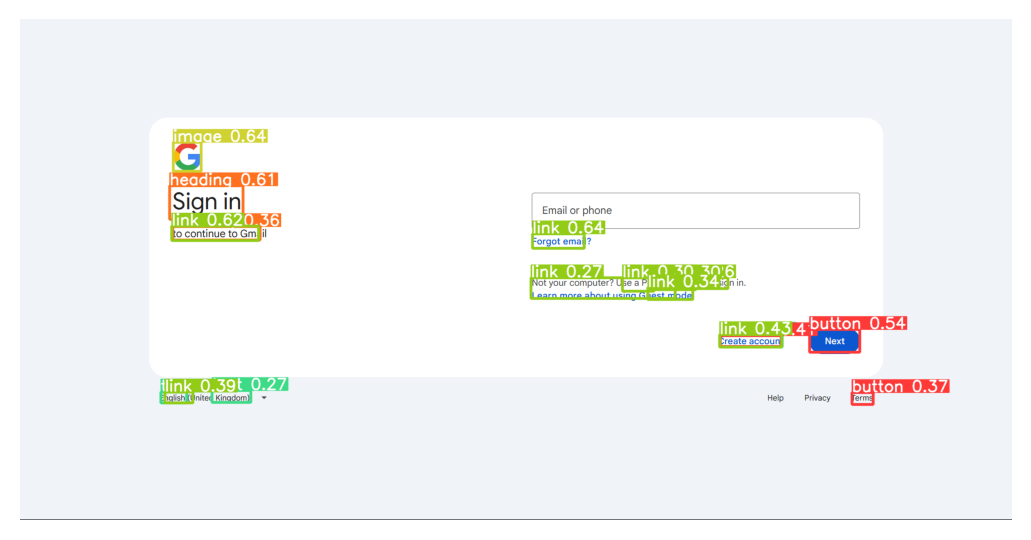

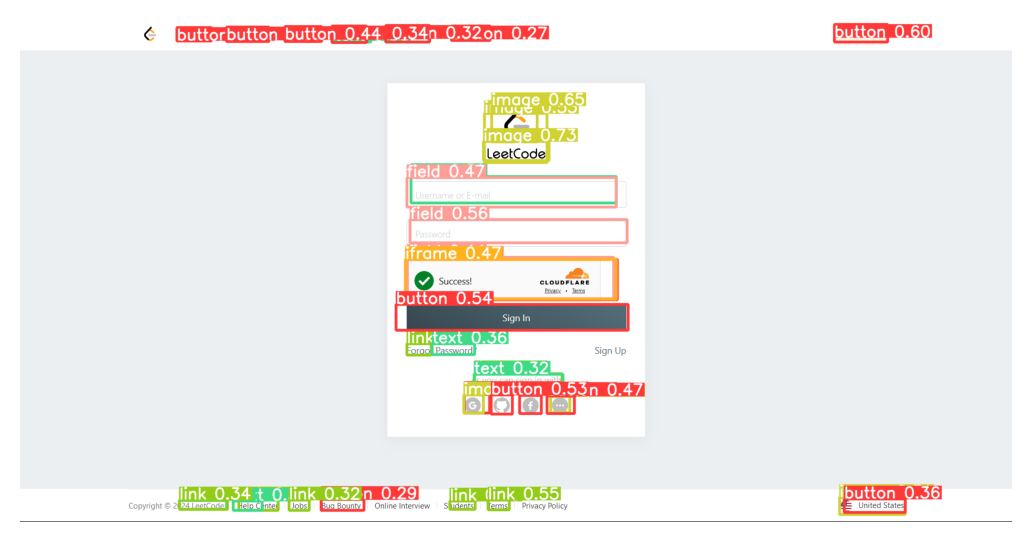

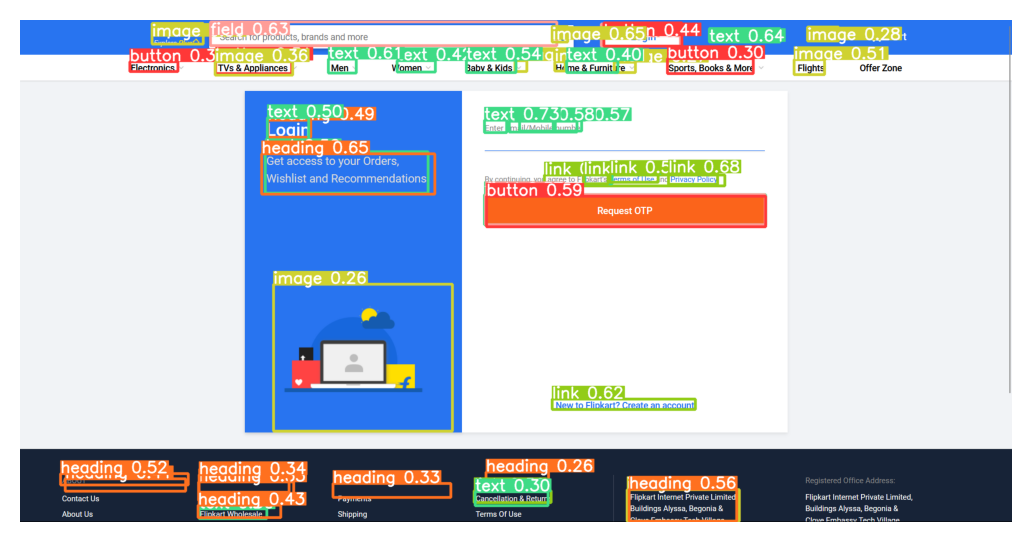

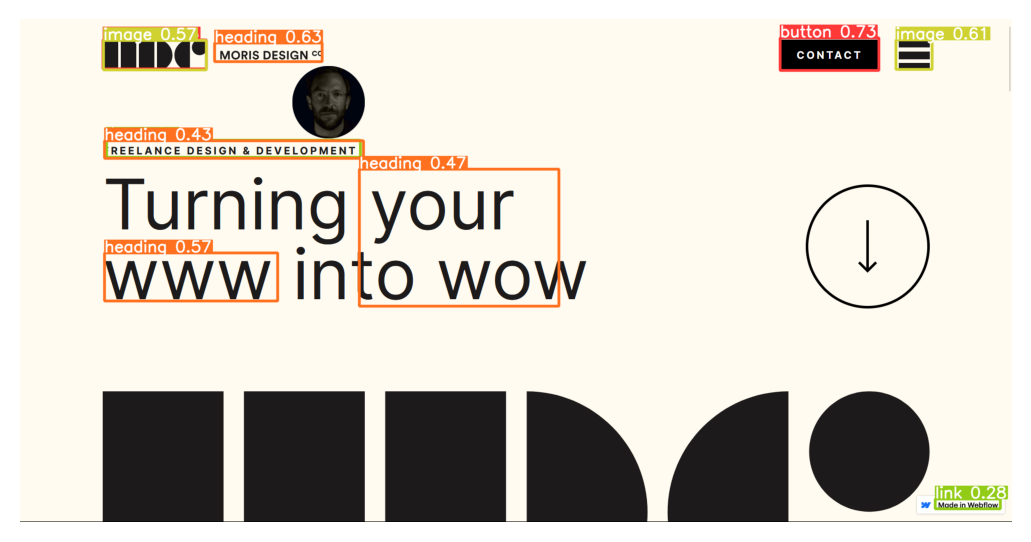

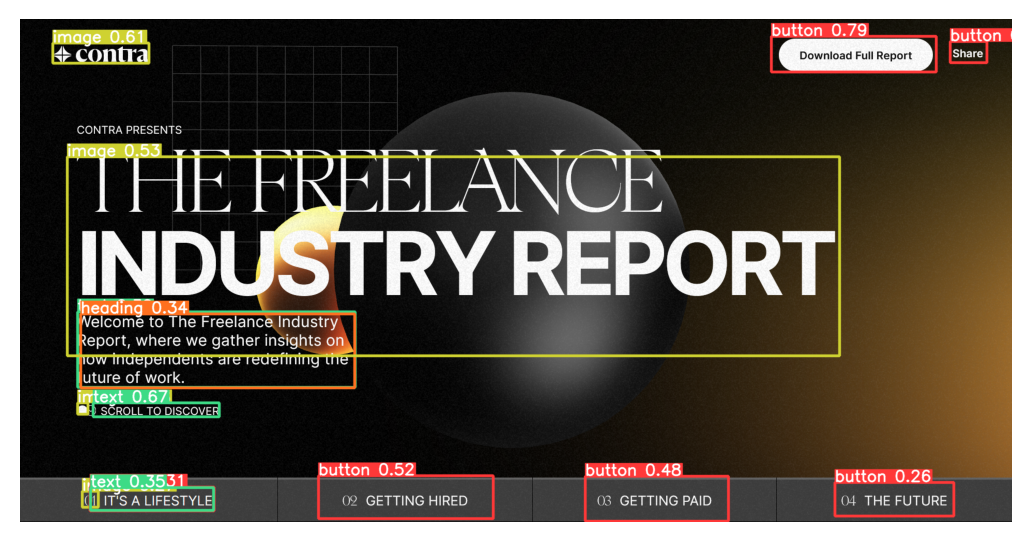

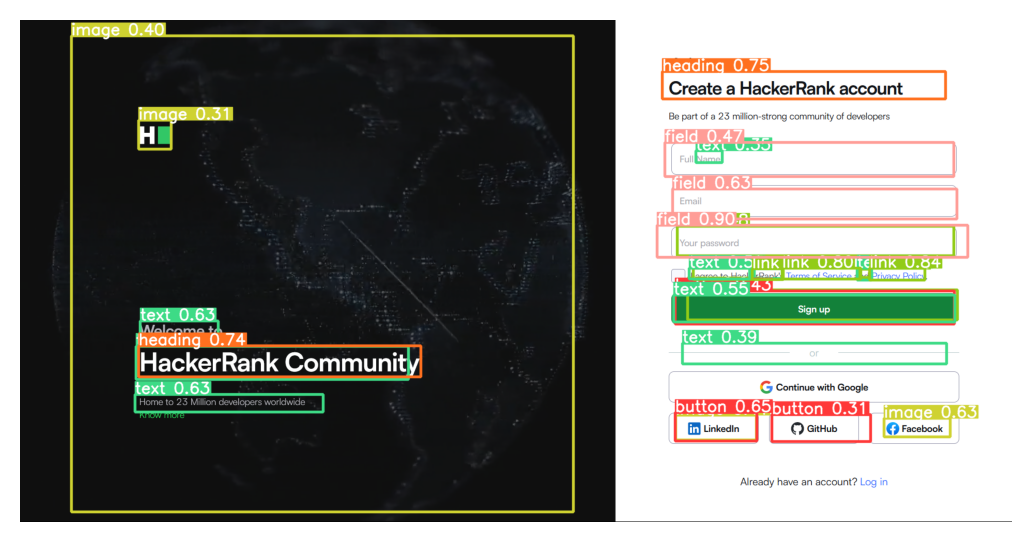

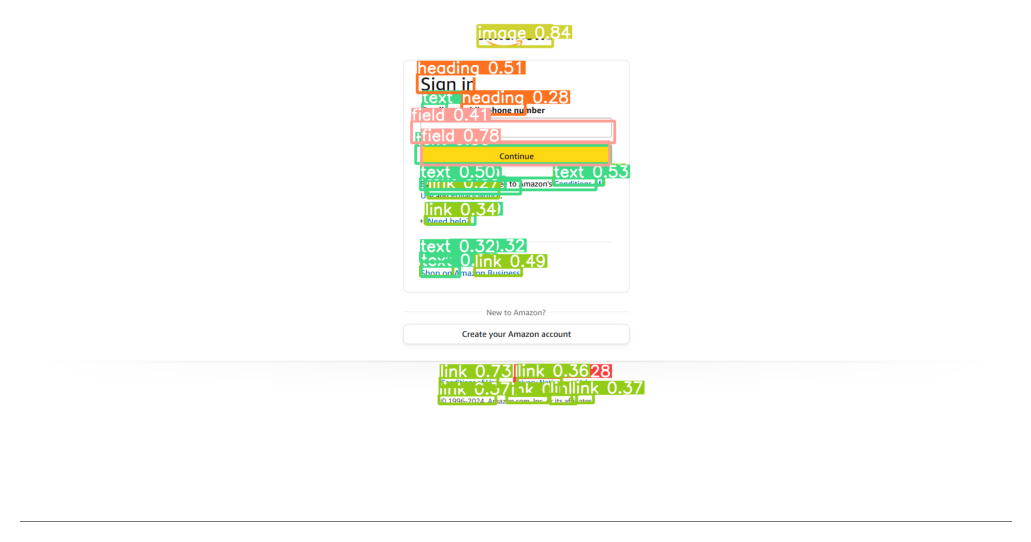

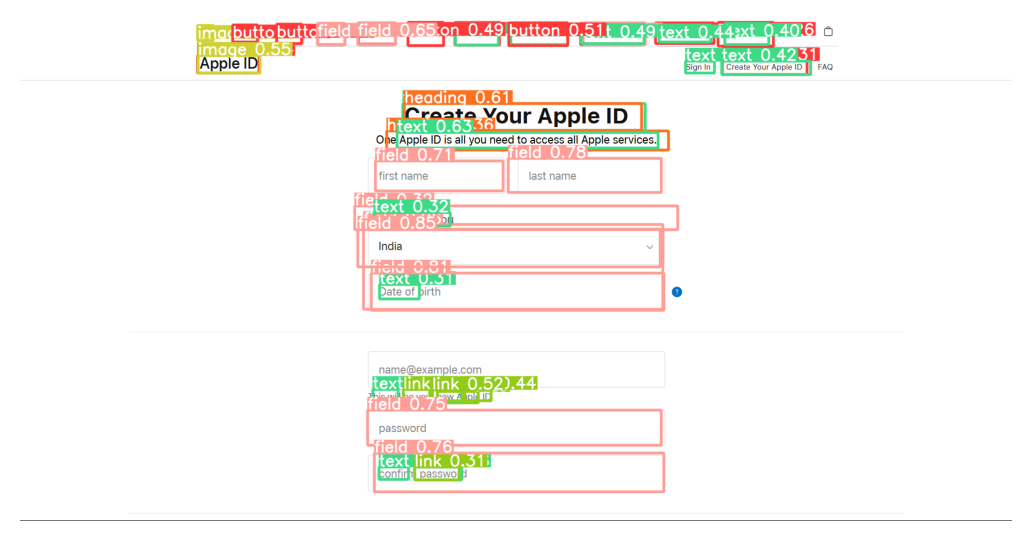

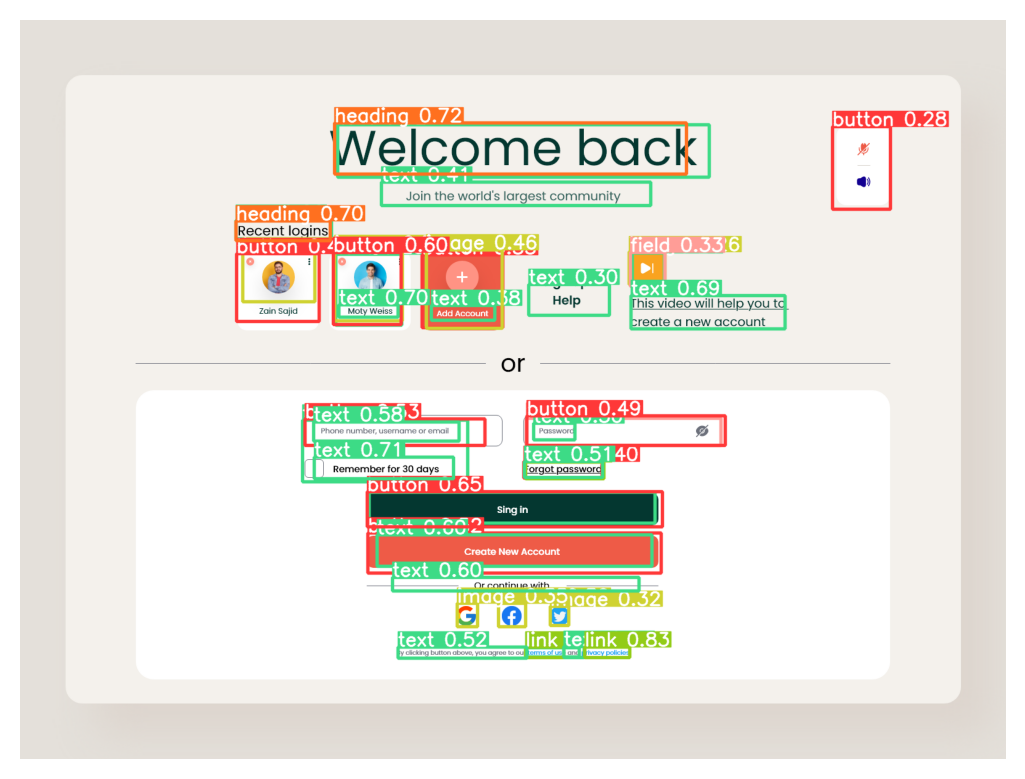

In [15]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Path to the directory containing the detection results
base_directory = "runs/detect"

# List experiment directories (exp1, exp2, ..., exp10)
experiment_directories = [os.path.join(base_directory, f"exp{i}") for i in range(16, 25)]

# Process each experiment directory
for experiment_dir in experiment_directories:
    # List files in the experiment directory
    detection_files = os.listdir(experiment_dir)
    
    # Process each detection file in the experiment directory
    for detection_file in detection_files:
        if detection_file.endswith(".jpg") or detection_file.endswith(".png"):
            # Load the image
            image_path = os.path.join(experiment_dir, detection_file)
            img = Image.open(image_path)

            # Create a subplot
            fig, ax = plt.subplots(1, dpi=200)  # Adjust DPI for better resolution
            ax.imshow(img)

            # Read the corresponding detection results file
            result_file = os.path.splitext(detection_file)[0] + ".txt"
            result_path = os.path.join(experiment_dir, "labels", result_file)

            # Read the detection results from the text file and plot bounding boxes
            if os.path.exists(result_path):
                with open(result_path, 'r') as f:
                    lines = f.readlines()
                    for line in lines:
                        class_id, x_center, y_center, width, height = map(float, line.split())
                        x1 = (x_center - width / 2) * img.width
                        y1 = (y_center - height / 2) * img.height
                        x2 = (x_center + width / 2) * img.width
                        y2 = (y_center + height / 2) * img.height

                        # Create a rectangle patch
                        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')

                        # Add the patch to the Axes
                        ax.add_patch(rect)

            # Remove axis labels for better clarity
            ax.axis('off')

            # Show the plot
            plt.show()
